In [56]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [6]:
from load_data import load_and_transform_data

In [7]:
X_train, y_train, X_val, y_val, X_test, y_test = load_and_transform_data(SEED=42)

Dataset already exists at: chest_xray_data

Dataset ready at: c:\Users\eirik\Desktop\FYSSTK3155_Dataprocessing_and_MachineLearning\Project3_FYSSTK3155-4155\Code\chest_xray_data
Dataset already exists at: chest_xray_data_split



Loading test: 100%|██████████| 587/587 [00:04<00:00, 139.92it/s]


Train: (4684, 480, 480), Val: (585, 480, 480), Test: (587, 480, 480)


In [8]:
# Check shape of subsets
print(f"X train shape:\t", X_train.shape)
print(f"y train shape:\t", y_train.shape)
print(f"X val shape:\t", X_val.shape)
print(f"y val shape:\t", y_val.shape)
print(f"X test shape:\t", X_test.shape)
print(f"y test shape:\t", y_test.shape)

X train shape:	 (4684, 480, 480)
y train shape:	 (4684,)
X val shape:	 (585, 480, 480)
y val shape:	 (585,)
X test shape:	 (587, 480, 480)
y test shape:	 (587,)


In [50]:
GRU = keras.Sequential()                          # Create a base sequential model
GRU.add(keras.Input(shape=(480, 480)))            # Set the input shape
GRU.add(layers.GRU(units=240, return_sequences=True))     # Add a simple RNN layer
GRU.add(layers.GRU(units=30))     # Add a simple RNN layer
GRU.add(layers.Dense(units=1, activation="sigmoid")) # Output layer

# Get a summary of model configuration
GRU.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_30 (GRU)                    │ (None, 480, 240)       │       519,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_31 (GRU)                    │ (None, 30)             │        24,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 544,351 (2.08 MB)

 Trainable params: 544,351 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
batch_size = 32
epochs = 10

In [52]:
GRU.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

GRU_trainer = GRU.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs)

GRU_test_loss, GRU_test_acc = GRU.evaluate(X_test, y_test)
print(f'GRU Test Accuracy: {GRU_test_acc}')

Epoch 1/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 104s 690ms/step - accuracy: 0.7231 - loss: 0.5877 - val_accuracy: 0.7299 - val_loss: 0.5900
Epoch 2/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 98s 669ms/step - accuracy: 0.7673 - loss: 0.4930 - val_accuracy: 0.8256 - val_loss: 0.3883
Epoch 3/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 96s 656ms/step - accuracy: 0.8356 - loss: 0.3645 - val_accuracy: 0.8855 - val_loss: 0.2885
Epoch 4/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 105s 714ms/step - accuracy: 0.8792 - loss: 0.2814 - val_accuracy: 0.9094 - val_loss: 0.2497
Epoch 5/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 97s 658ms/step - accuracy: 0.8984 - loss: 0.2428 - val_accuracy: 0.9145 - val_loss: 0.2253
Epoch 6/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 95s 647ms/step - accuracy: 0.9167 - loss: 0.2170 - val_accuracy: 0.9316 - val_loss: 0.2024
Epoch 7/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 104s 709ms/step - accuracy: 0.9225 - loss: 0.2004 - val_accuracy: 0.9026 - val_loss: 0.2254
Epoch 8/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 111s 758ms/step - accuracy: 0.9366 - los

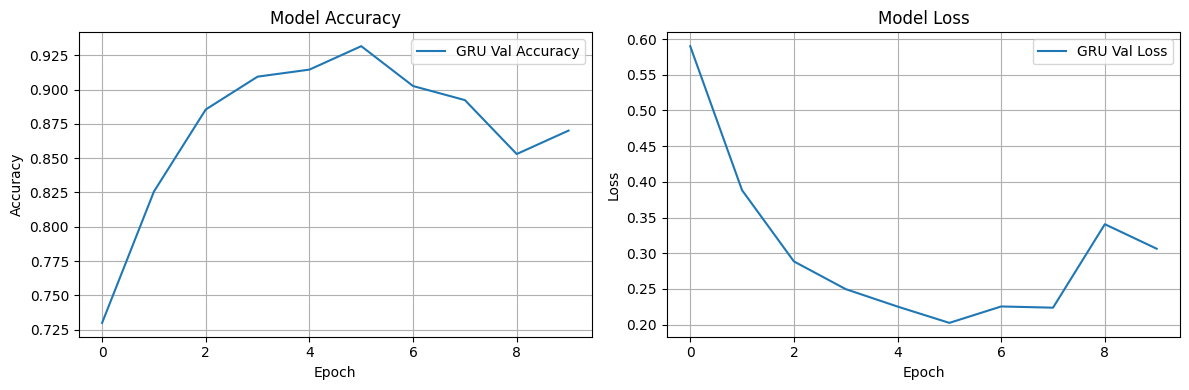

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax1.plot(GRU_trainer.history['val_accuracy'], label='GRU Val Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy')
ax1.legend()
ax1.grid(True)

# Loss plot
ax2.plot(GRU_trainer.history['val_loss'], label='GRU Val Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Model Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step


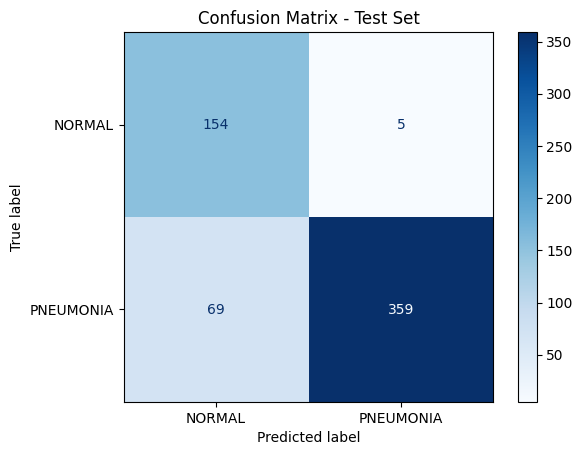

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.8739 - loss: 0.2988
Test Accuracy: 0.8739
Test Loss: 0.2988


In [58]:
# For binary_crossentropy with sigmoid
y_pred = GRU.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Threshold at 0.5

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                               display_labels=['NORMAL', 'PNEUMONIA'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

# Print test metrics
test_loss, test_acc = GRU.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')